In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("adult.csv")
#Importing the dataset

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Exploratory Data Analysis - First impressions

In [5]:
df.isnull().sum()
#Checking for null values

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

$No$ $Null$ $Values$

In [6]:
df['income'].value_counts()
#Checking for erroneous values in the target columns

<=50K    24720
>50K      7841
Name: income, dtype: int64

No erroneous values!!!

In [7]:
df['Income_Level'] = np.where(df['income']=='<=50K', 0, 1)
#Creating a new income column with 0's and 1's

In [8]:
df.Income_Level.value_counts()

0    24720
1     7841
Name: Income_Level, dtype: int64

New column values match $income$ column

In [9]:
df.drop(columns='income',inplace=True)
#Dropping the old income column

In [10]:
df.dtypes
#Checking data types, especially for the target column and separating numerical and categorical columns!

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
Income_Level       int64
dtype: object

In [11]:
num = ['age', 'fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','Income_Level']
cat = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country','Income_Level']
#Creating lists for numerical and categorical variables for further analysis

In [12]:
df[num].describe()
# Descriptive statistice of the numerical data

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Income_Level
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Exploratory Data Analysis - Numerical variables

/Users/raunaqsinghkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raunaqsinghkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raunaqsinghkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

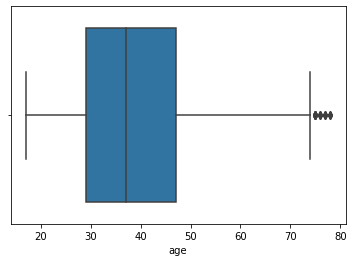

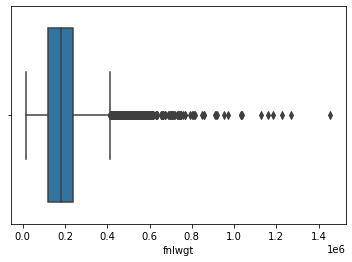

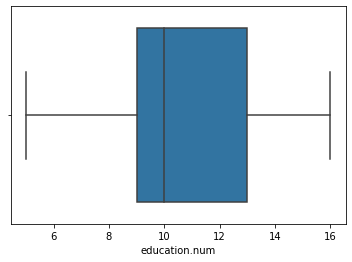

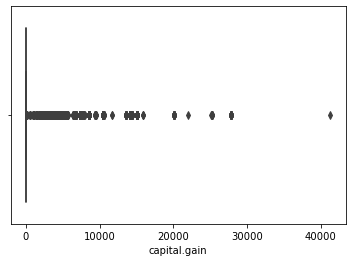

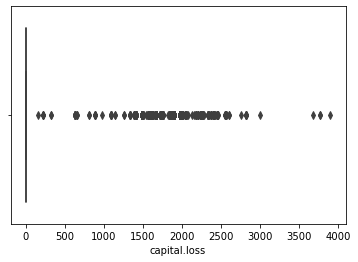

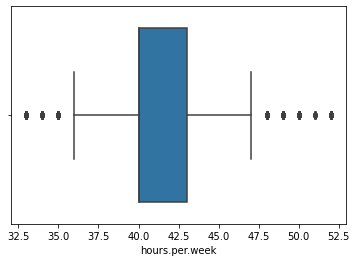

In [244]:
for i in range(len(num)-1) :
    plt.figure()
    sbn.boxplot(df[num[i]])
    plt.show
    
#Creating boxplots to assess outliers using visualization

/Users/raunaqsinghkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


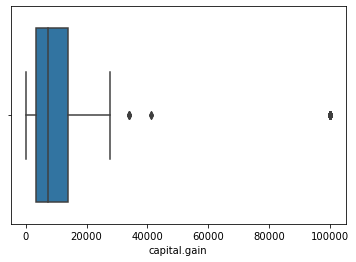

/Users/raunaqsinghkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


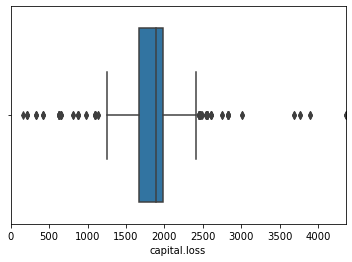

In [14]:
plt.figure()
df1 = df[df['capital.gain']>0]
clg = sbn.boxplot(df1['capital.gain'])
plt.show()
df2 = df[df['capital.loss']>0]
cll = sbn.boxplot(df2['capital.loss'])
cll.set(xlim=(0, df['capital.loss'].max()))
plt.show()

#Negative and positive values of capital gain and capital loss respectively have to be excluded in outlier detection
#But a considerable number of outliers found in capital gains and losses

In [15]:
outlier_indexes = []

#def outlier_index_detection(columns) :
#    Q1 = np.percentile(columns,25,interpolation='midpoint')
#    Q3 = np.percentile(columns,75,interpolation='midpoint')
#    IQR = Q3 - Q1
#    low_lim = Q1 - 1.5*IQR
#    up_lim = Q3 + 1.5*IQR
#    x=(df[(columns>up_lim) | (columns<low_lim)  ].index.tolist())
#    global outlier_indexes
#    outlier_indexes = outlier_indexes + x
    

In [16]:
Q1 = np.percentile(df['age'],25,interpolation='midpoint')
Q3 = np.percentile(df['age'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
x=(df[(df['age']>up_lim) | (df['age']<low_lim)  ].index.tolist())
global outlier_indexes
outlier_indexes = outlier_indexes + x
#Age only has larger outliers

In [17]:
Q1 = np.percentile(df['education.num'],25,interpolation='midpoint')
Q3 = np.percentile(df['education.num'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
x=(df[(df['education.num']<low_lim)  ].index.tolist())
global outlier_indexes
outlier_indexes = outlier_indexes + x
#We need to remove the bottom education years, since we there are quite a lot of outliers and...
#...we expect to have most our customers having completed atleast high school

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

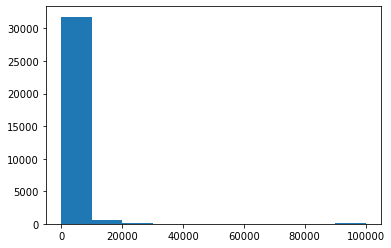

In [18]:
plt.hist(df['capital.gain'])
#For capital gain, just the last few values need to be removed

In [19]:
df['capital.gain'].value_counts()
#Checking outliers

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: capital.gain, Length: 119, dtype: int64

In [20]:
to_remove=df[df['capital.gain']==99999].index.tolist()
outlier_indexes = outlier_indexes + to_remove
#Adding capital gain indices to be removed

(array([3.1053e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

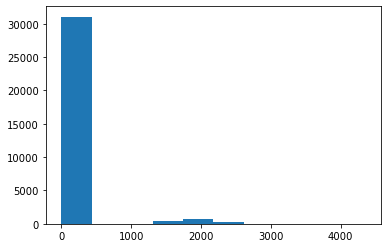

In [21]:
plt.hist(df['capital.loss'])
#For capital loss, checking outliers

In [22]:
df['capital.loss'].value_counts()
#No need to correct outliers here

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64

In [23]:
df['hours.per.week'].describe()
#It would be better to remove outliers here using the interquartile range, removing outliers at the top and bottom

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [24]:
Q1 = np.percentile(df['hours.per.week'],25,interpolation='midpoint')
Q3 = np.percentile(df['hours.per.week'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
x=(df[(df['hours.per.week']>up_lim) | (df['hours.per.week']<low_lim)  ].index.tolist())
outlier_indexes
outlier_indexes = outlier_indexes + x
#Getting outlier indexes

In [25]:
df.drop(index = outlier_indexes,inplace=True)
#Removing outliers on index

In [26]:
df.describe()
#Outliers are removed, and data is ready for analysis

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,Income_Level
count,22556.000000,2.255600e+04,22556.00000,22556.000000,22556.00000,22556.000000,22556.000000
mean,38.504212,1.907775e+05,10.35383,612.735059,89.29030,41.590397,0.259709
std,12.047715,1.050061e+05,2.19892,2529.205790,405.09479,4.019718,0.438485
min,17.000000,1.487800e+04,5.00000,0.000000,0.00000,33.000000,0.000000
25%,29.000000,1.191768e+05,9.00000,0.000000,0.00000,40.000000,0.000000
50%,37.000000,1.795790e+05,10.00000,0.000000,0.00000,40.000000,0.000000
75%,47.000000,2.369192e+05,13.00000,0.000000,0.00000,43.000000,1.000000
max,78.000000,1.455435e+06,16.00000,41310.000000,4356.00000,52.000000,1.000000


In [28]:
df.shape
#Checking the entries in the data frame

(22556, 15)

[Text(0.5, 0, 'Income Levels over or under/equal 50k'),
 Text(0, 0.5, 'Count of observations')]

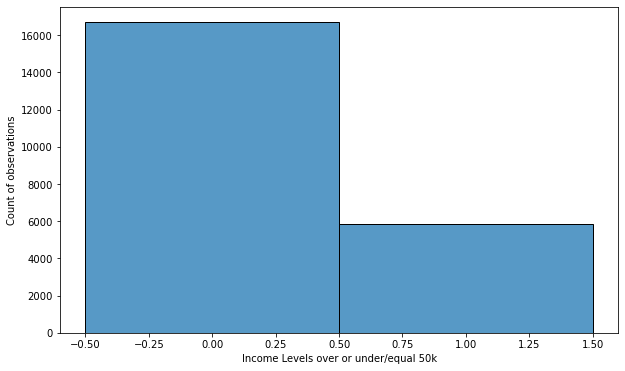

In [29]:
plt.figure(figsize=(10,6))
ax = sbn.histplot(df.Income_Level, discrete=True)
ax.set(xlabel='Income Levels over or under/equal 50k', ylabel='Count of observations')
#Checking the distribution of income levels to check for bias

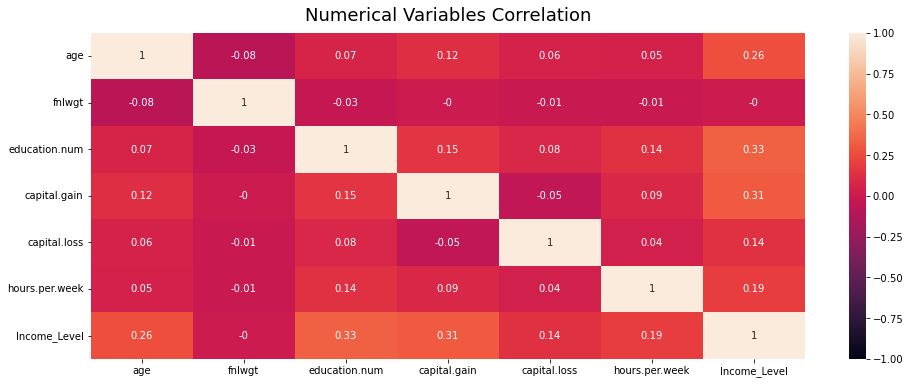

In [30]:
plt.figure(figsize=(16, 6))
heatmap = sbn.heatmap(round(df[num].corr(),2),vmin=-1, vmax=1,annot=True)
heatmap.set_title('Numerical Variables Correlation', fontdict={'fontsize':18}, pad=12);
#Checking for strong correlations between numerical variables

### Highest Corellations :
- 1. age and income
- 2. education number and income
- 3. hours/week and income
- 4. capital gain and income

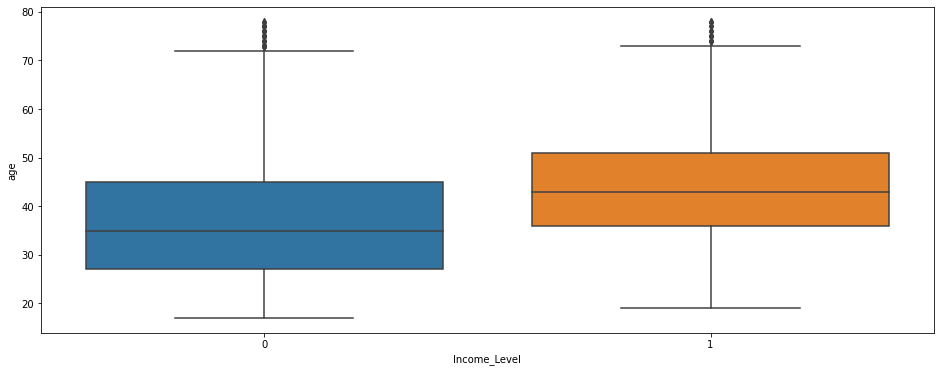

In [31]:
plt.figure(figsize=(16,6))
ax = sbn.boxplot(y="age",x="Income_Level",data=df)


### As general convention would say, mean age of subjects with an income level greater than $50k is greater

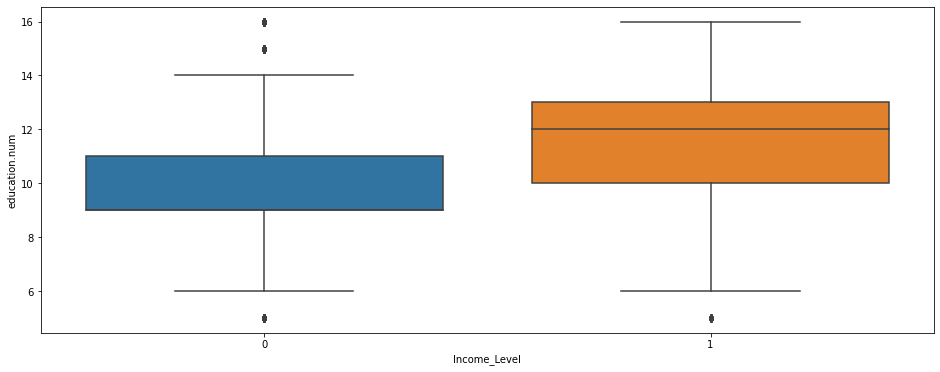

In [32]:
plt.figure(figsize=(16,6))
ax = sbn.boxplot(y="education.num",x="Income_Level",data=df)


### Number of years of education too has a positive impact on income level

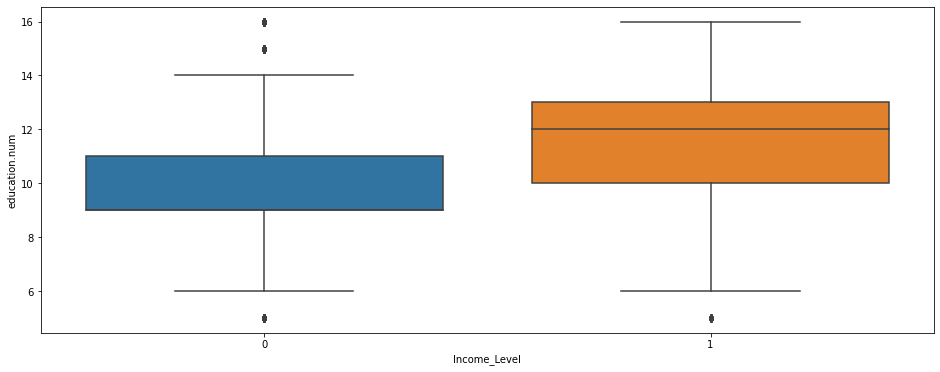

In [33]:
plt.figure(figsize=(16,6))
ax = sbn.boxplot(y="education.num",x="Income_Level",data=df)



### The mean of number of years of education is higher for people with income > $50k

# Exploratory Data Analysis - Categorical Variables

In [36]:
df['workclass'].value_counts()
#857 unknown values

Private             16278
Local-gov            1616
Self-emp-not-inc     1347
State-gov             989
?                     857
Federal-gov           825
Self-emp-inc          638
Without-pay             3
Never-worked            3
Name: workclass, dtype: int64

In [59]:
drop_index=df[df['workclass']=='?'].index
df.drop(index=drop_index, inplace=True)
#This is a high number of observations, and putting them into any other class would lead to bias, hence we'll have to drop 'em'

In [38]:
df['education'].value_counts()
#No missing values

HS-grad         7973
Some-college    4948
Bachelors       4022
Masters         1253
Assoc-voc       1086
Assoc-acdm       780
11th             651
10th             607
9th              389
Prof-school      318
12th             276
Doctorate        253
Name: education, dtype: int64

In [40]:
df['marital.status'].value_counts()
#No missing values

Married-civ-spouse       10773
Never-married             6852
Divorced                  3398
Separated                  741
Widowed                    510
Married-spouse-absent      268
Married-AF-spouse           14
Name: marital.status, dtype: int64

In [42]:
df['occupation'].value_counts()
#860 missing values

Craft-repair         3307
Exec-managerial      3021
Prof-specialty       2998
Adm-clerical         2938
Sales                2309
Other-service        1769
Machine-op-inspct    1604
Transport-moving     1072
Handlers-cleaners     936
?                     860
Tech-support          733
Protective-serv       484
Farming-fishing       468
Priv-house-serv        50
Armed-Forces            7
Name: occupation, dtype: int64

In [43]:
df['relationship'].value_counts()
#No missing values

Husband           9565
Not-in-family     5955
Own-child         2802
Unmarried         2548
Wife              1064
Other-relative     622
Name: relationship, dtype: int64

In [44]:
df['race'].value_counts()
#No missing values

White                 19115
Black                  2336
Asian-Pac-Islander      719
Amer-Indian-Eskimo      217
Other                   169
Name: race, dtype: int64

In [45]:
df['sex'].value_counts()
#No missing values

Male      15425
Female     7131
Name: sex, dtype: int64

In [46]:
df['native.country'].value_counts()
#391 missing values

United-States                 20457
?                               391
Mexico                          284
Philippines                     150
Germany                          99
Canada                           76
Puerto-Rico                      73
India                            70
England                          62
Cuba                             62
Jamaica                          62
El-Salvador                      54
China                            51
Vietnam                          49
South                            46
Japan                            43
Italy                            43
Poland                           43
Columbia                         42
Dominican-Republic               40
Taiwan                           32
Guatemala                        31
Iran                             29
Haiti                            25
France                           22
Portugal                         22
Peru                             20
Nicaragua                   

In [48]:
df.loc[df["occupation"] == "?", "occupation"] = 'Other-service'
#For occupation, we will put the missing values into other services

In [49]:
df.occupation.value_counts()
#No more missing values

Craft-repair         3307
Exec-managerial      3021
Prof-specialty       2998
Adm-clerical         2938
Other-service        2629
Sales                2309
Machine-op-inspct    1604
Transport-moving     1072
Handlers-cleaners     936
Tech-support          733
Protective-serv       484
Farming-fishing       468
Priv-house-serv        50
Armed-Forces            7
Name: occupation, dtype: int64

In [52]:
df.loc[df["native.country"] == "?", "native.country"] = 'United-States'
#We'll put the missing values into the US, since around 300 extra additions to US won't hurt our algorithm

In [53]:
df['native.country'].value_counts()
#No more missing values

United-States                 20848
Mexico                          284
Philippines                     150
Germany                          99
Canada                           76
Puerto-Rico                      73
India                            70
England                          62
Cuba                             62
Jamaica                          62
El-Salvador                      54
China                            51
Vietnam                          49
South                            46
Japan                            43
Italy                            43
Poland                           43
Columbia                         42
Dominican-Republic               40
Taiwan                           32
Guatemala                        31
Iran                             29
Haiti                            25
Portugal                         22
France                           22
Peru                             20
Nicaragua                        19
Ireland                     

[Text(0.5, 0, 'Work Class'), Text(0, 0.5, 'Income >$50k probability')]

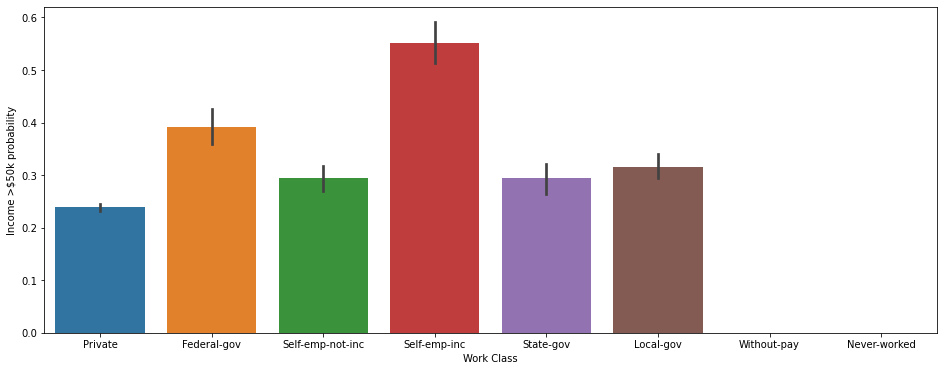

In [63]:
plt.figure(figsize=(16,6))
ax = sbn.barplot(x=df.workclass,y=df.Income_Level)
ax.set(xlabel='Work Class',ylabel='Income >$50k probability')
#Comparing workclass with income

[Text(0.5, 0, 'Education Level'), Text(0, 0.5, 'Income >$50k probability')]

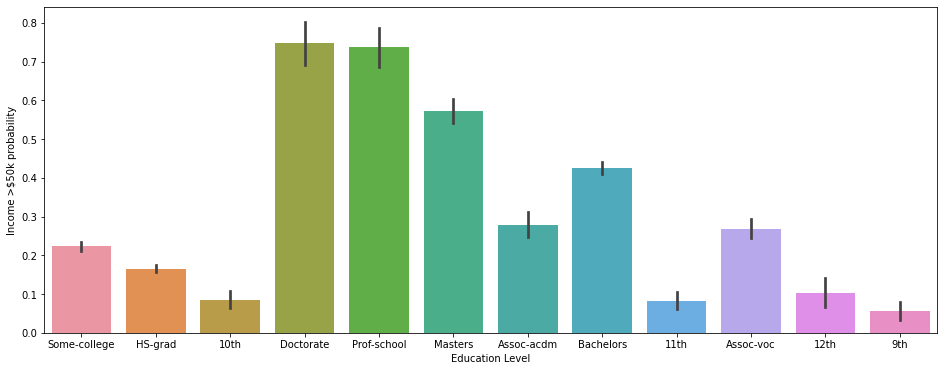

In [64]:
plt.figure(figsize=(16,6))
ax = sbn.barplot(x=df.education,y=df.Income_Level)
ax.set(xlabel='Education Level',ylabel='Income >$50k probability')
#Comparing Education with income

[Text(0.5, 0, 'Marital Status'), Text(0, 0.5, 'Income >$50k probability')]

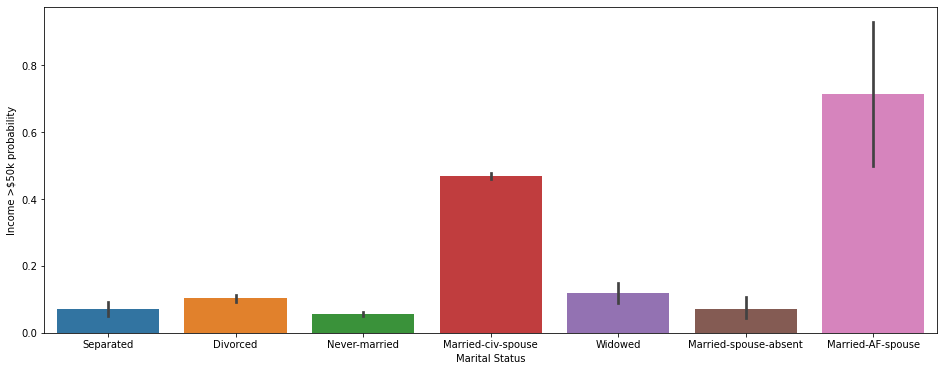

In [67]:
plt.figure(figsize=(16,6))
ax = sbn.barplot(x=df['marital.status'],y=df.Income_Level)
ax.set(xlabel='Marital Status',ylabel='Income >$50k probability')
#Comparing Marital Status with income

[Text(0.5, 0, 'Occupation'), Text(0, 0.5, 'Income >$50k probability')]

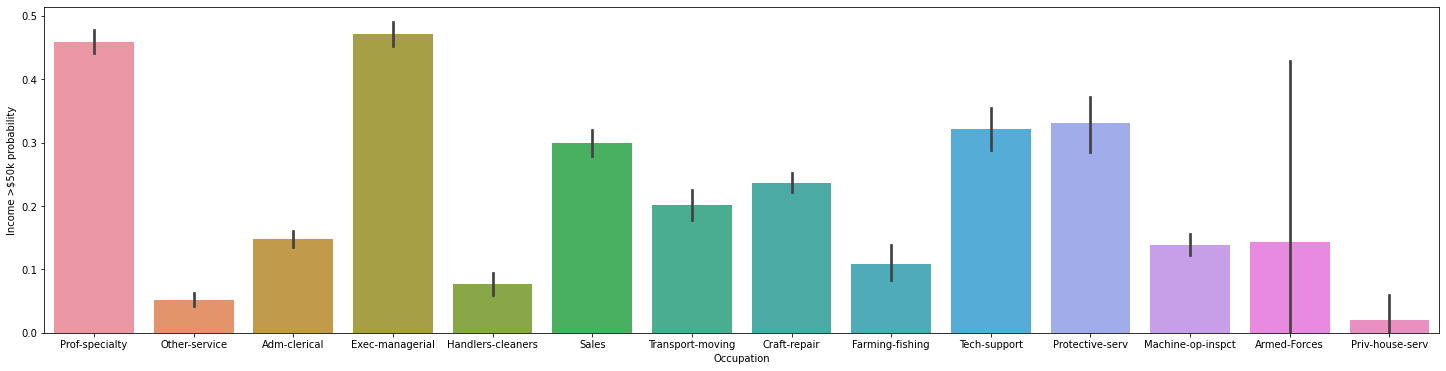

In [71]:
plt.figure(figsize=(25,6))
ax = sbn.barplot(x=df.occupation,y=df.Income_Level)
ax.set(xlabel='Occupation',ylabel='Income >$50k probability')
#Comparing Occupation with income

[Text(0.5, 0, 'Relationship Status'), Text(0, 0.5, 'Income >$50k probability')]

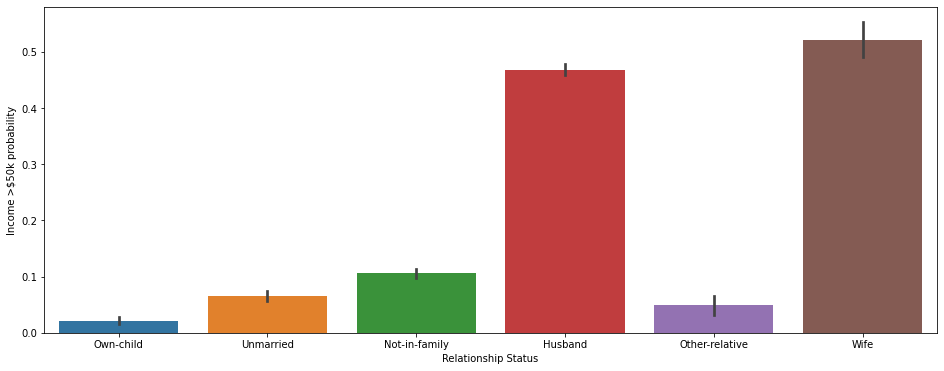

In [73]:
plt.figure(figsize=(16,6))
ax = sbn.barplot(x=df.relationship,y=df.Income_Level)
ax.set(xlabel='Relationship Status',ylabel='Income >$50k probability')
#Comparing relationship with income

[Text(0.5, 0, 'Race'), Text(0, 0.5, 'Income >$50k probability')]

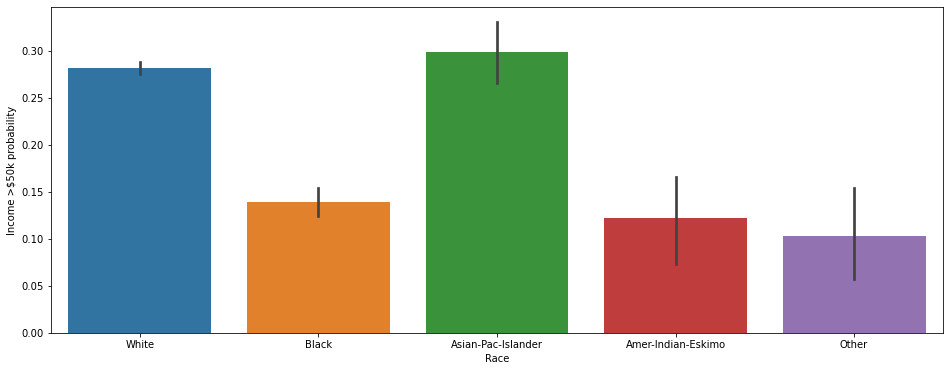

In [75]:
plt.figure(figsize=(16,6))
ax = sbn.barplot(x=df.race,y=df.Income_Level)
ax.set(xlabel='Race',ylabel='Income >$50k probability')
#Comparing Race with income

[Text(0.5, 0, 'Sex'), Text(0, 0.5, 'Income >$50k probability')]

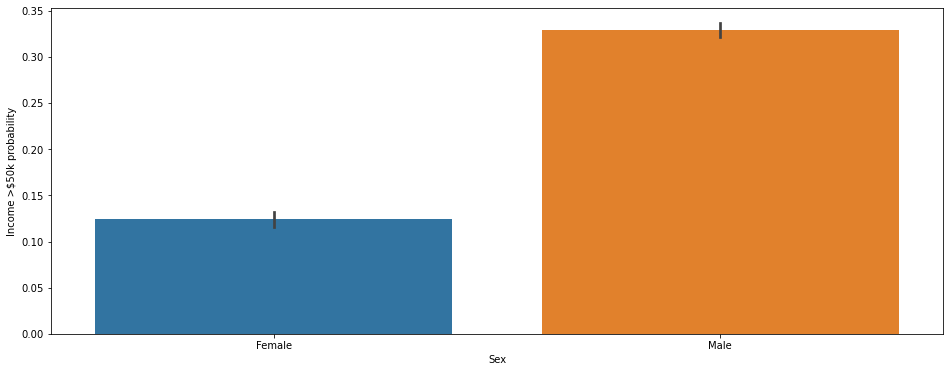

In [76]:
plt.figure(figsize=(16,6))
ax = sbn.barplot(x=df.sex,y=df.Income_Level)
ax.set(xlabel='Sex',ylabel='Income >$50k probability')
#Comparing Sex with income

[Text(0.5, 0, 'Native Country'), Text(0, 0.5, 'Income >$50k probability')]

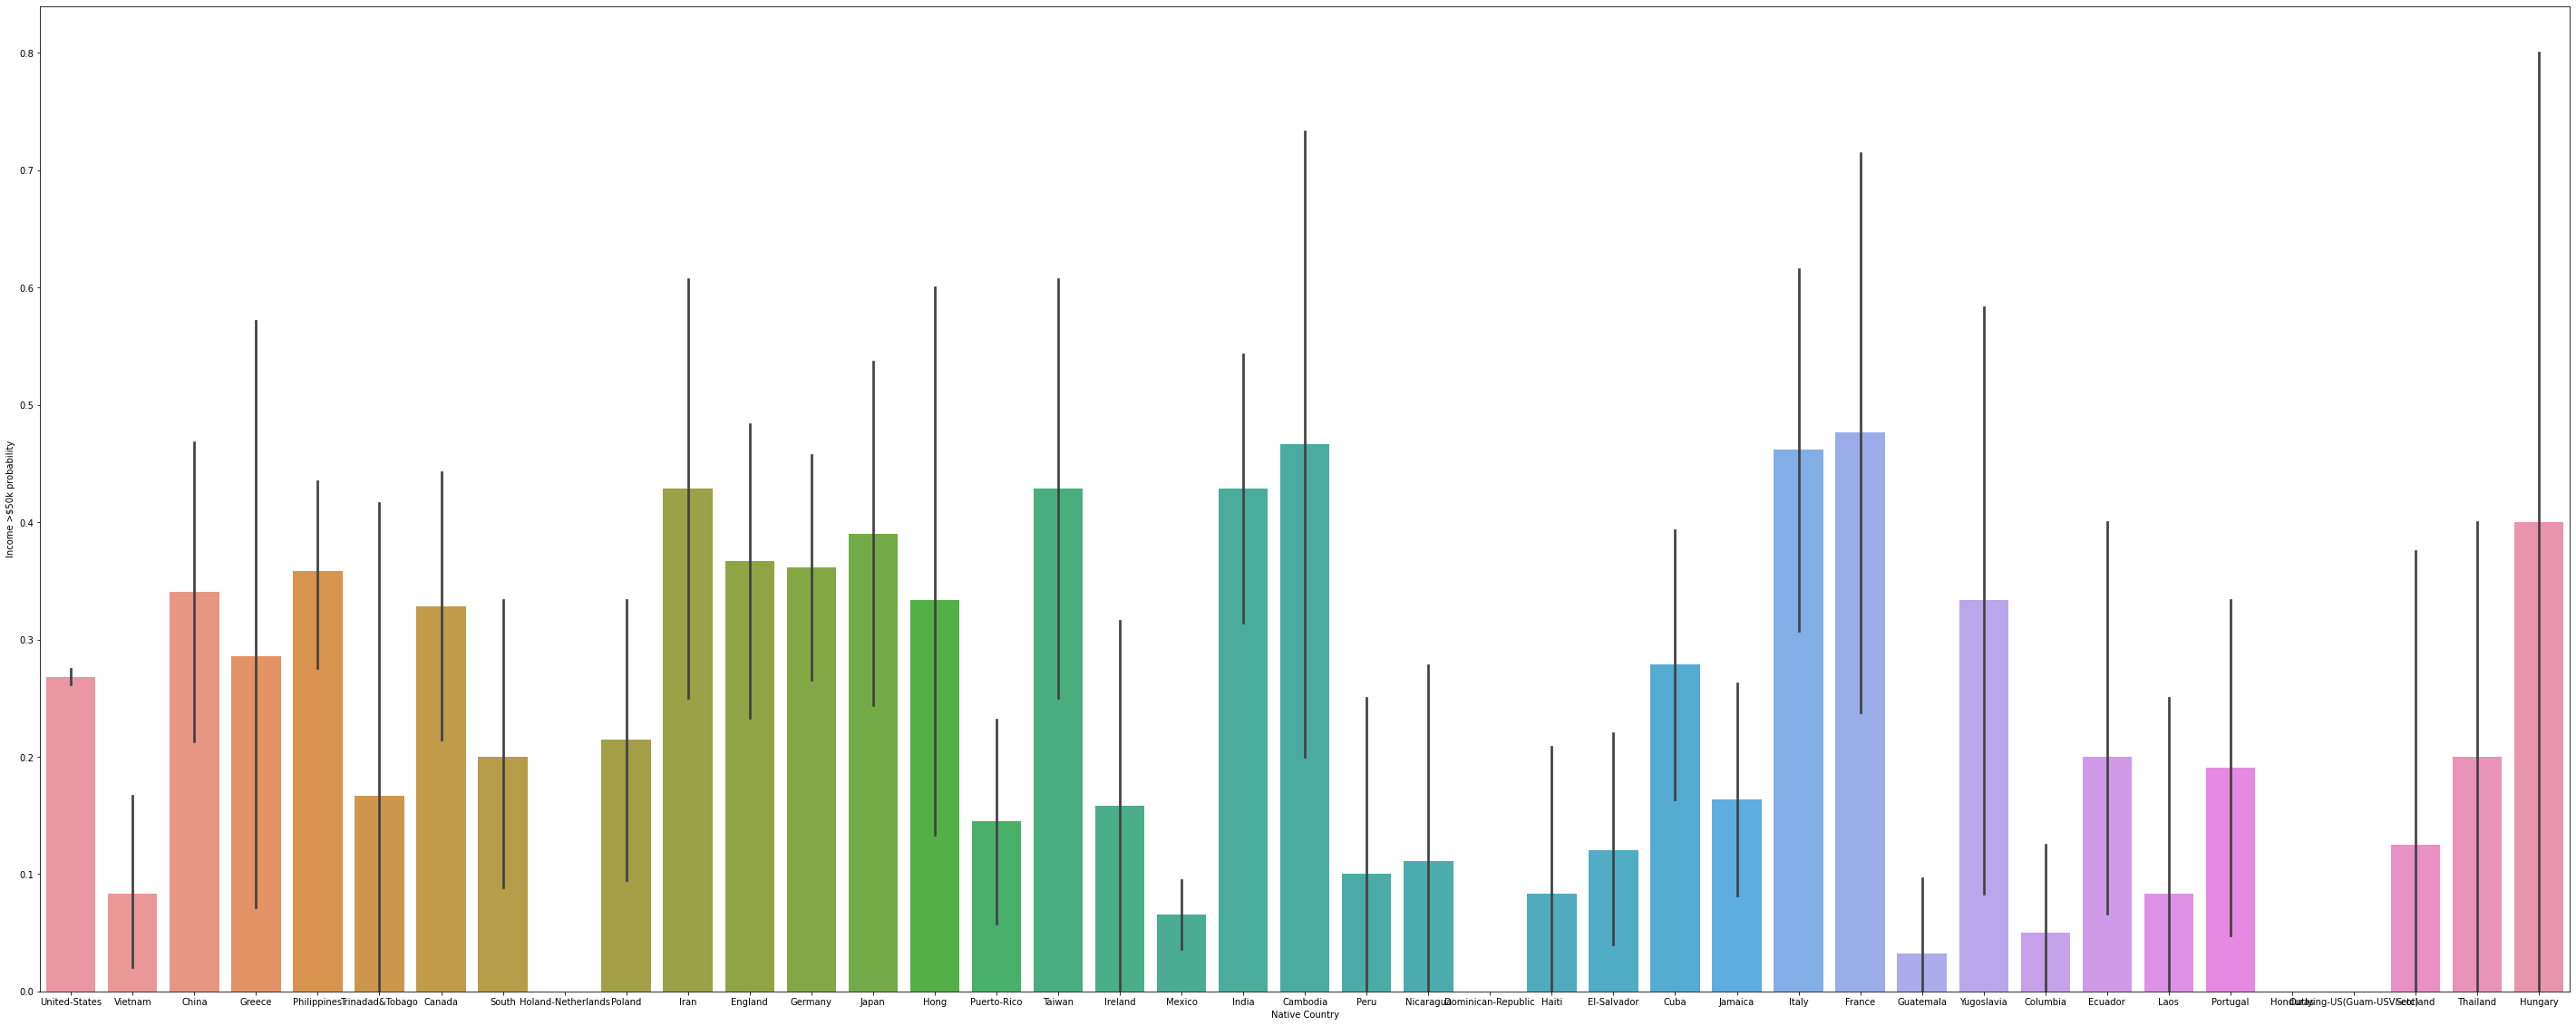

In [82]:
plt.figure(figsize=(50,20))
ax = sbn.barplot(x=df['native.country'],y=df.Income_Level)
ax.set(xlabel='Native Country',ylabel='Income >$50k probability')
#Comparing Native Country with income

# Feature Engineering

In [83]:
df.columns
#Feature engineering to select columns and simplify categorical variables

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'Income_Level'],
      dtype='object')

In [84]:
df[['education','education.num']]
#We can drop the education column, since we have an education.num columns

,education,education.num
4,Some-college,10
5,HS-grad,9
6,10th,6
8,HS-grad,9
10,Doctorate,16
...,...,...
32555,Masters,14
32556,Some-college,10
32557,Assoc-acdm,12
32558,HS-grad,9


In [86]:
df.drop(columns='education',inplace=True)
#Dropping the education columns

In [87]:
df.head()
#Checking for more features to be corrected

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income_Level
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
8,68,Federal-gov,422013,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
10,45,Private,172274,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1


In [88]:
df['marital.status']= df['marital.status'].replace(['Never-married','Divorced','Separated','Widowed'],0)
df['marital.status']= df['marital.status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],1)
#We will convert marital status into binary variables

In [89]:
df['marital.status'].value_counts()
#Marital status is now a binary variable

0    10931
1    10768
Name: marital.status, dtype: int64

In [90]:
df.workclass.value_counts()
#We can convert this into 3 categories, private employees, government employees, and self employed

Private             16278
Local-gov            1616
Self-emp-not-inc     1347
State-gov             989
Federal-gov           825
Self-emp-inc          638
Without-pay             3
Never-worked            3
Name: workclass, dtype: int64

In [92]:
df['workclass'] = df['workclass'].replace(['Local-gov','State-gov','Federal-gov'],'Gov')
df['workclass'] = df['workclass'].replace(['Self-emp-not-inc','Self-emp-inc'],'Self')
#Merging government and self employed into separete categories

In [96]:
drop_indices = df[(df['workclass']=='Without-pay')|(df['workclass']=='Never-worked')].index
df.drop(index=drop_indices, inplace = True)
#Dropping without pay and never worked, just 6 observations

In [98]:
df_workclass = pd.get_dummies(df['workclass'])
#Getting dummies for the columns

In [104]:
df=pd.concat([df,df_workclass],axis=1)
#Concatenating the two df's

In [107]:
df[['workclass','Gov','Private','Self']].head(20)
#Checking if concatenation is correct

,workclass,Gov,Private,Self
4,Private,0,1,0
5,Private,0,1,0
6,Private,0,1,0
8,Gov,1,0,0
10,Private,0,1,0
11,Self,0,0,1
15,Private,0,1,0
17,Private,0,1,0
18,Private,0,1,0
19,Private,0,1,0


In [128]:
df.drop(columns= 'workclass',inplace=True)
#We can remove the workclass columns

In [109]:
df.drop(columns= 'relationship',inplace=True)
#We can remove the relationship columns

In [111]:
df['native.country']= df['native.country'].replace('United-States',1)
#Native Country can be set to US or Outside US, US = 1

In [117]:
df.loc[df['native.country'] != 1, 'native.country'] = 0
#Outside US = 2

In [132]:
df.loc[df['sex']== 'Male','sex']= 1
df.loc[df['sex']== 'Female', 'sex']=0
#Making sex binary

In [133]:
df.sex.value_counts()
#Sex is now a binary variable

1    14948
0     6745
Name: sex, dtype: int64

In [135]:
df.drop(columns = 'occupation', inplace=True)
#We can drop the occupation columns, since it's arbitrary

In [136]:
df.head()

,age,fnlwgt,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income_Level,Gov,Private,Self
4,41,264663,10,0,White,0,0,3900,40,1,0,0,1,0
5,34,216864,9,0,White,0,0,3770,45,1,0,0,1,0
6,38,150601,6,0,White,1,0,3770,40,1,0,0,1,0
8,68,422013,9,0,White,0,0,3683,40,1,0,1,0,0
10,45,172274,16,0,Black,0,0,3004,35,1,1,0,1,0


In [137]:
df.race.value_counts()
#We can create dummy variables for race

White                 18434
Black                  2205
Asian-Pac-Islander      693
Amer-Indian-Eskimo      205
Other                   156
Name: race, dtype: int64

In [138]:
df_race = pd.get_dummies(df['race'])
#Getting dummies

In [139]:
df = pd.concat([df,df_race],axis = 1)
#Concatenating dataframes

In [140]:
df.head()
#Checking if concatenation is done correctly

,age,fnlwgt,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income_Level,Gov,Private,Self,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
4,41,264663,10,0,White,0,0,3900,40,1,0,0,1,0,0,0,0,0,1
5,34,216864,9,0,White,0,0,3770,45,1,0,0,1,0,0,0,0,0,1
6,38,150601,6,0,White,1,0,3770,40,1,0,0,1,0,0,0,0,0,1
8,68,422013,9,0,White,0,0,3683,40,1,0,1,0,0,0,0,0,0,1
10,45,172274,16,0,Black,0,0,3004,35,1,1,0,1,0,0,0,1,0,0


In [141]:
df.drop(columns='race',inplace=True)
#Dropping Race column

In [142]:
df.head()
#Our dataframe is now ready for analysis

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,native.country,Income_Level,Gov,Private,Self,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
4,41,264663,10,0,0,0,3900,40,1,0,0,1,0,0,0,0,0,1
5,34,216864,9,0,0,0,3770,45,1,0,0,1,0,0,0,0,0,1
6,38,150601,6,0,1,0,3770,40,1,0,0,1,0,0,0,0,0,1
8,68,422013,9,0,0,0,3683,40,1,0,1,0,0,0,0,0,0,1
10,45,172274,16,0,0,0,3004,35,1,1,0,1,0,0,0,1,0,0


# Comparing Different Models - Naive Bayes, Logistic Regression, Decision Trees and Random Forest Trees

In [207]:
y = df.Income_Level
#Target variables

In [208]:
X = df.loc[:,df.columns != 'Income_Level']
#Predictor variables

Gaussian Naive Bayes

In [152]:
gnb = GaussianNB()
scores = cross_val_score(gnb, X, y , cv=5)
scores
#Accuracy with Naive Bayes

array([0.71929016, 0.8580318 , 0.73450104, 0.73467036, 0.73467036])

In [153]:
Mean_Accuracy_GNB = scores.mean()
Mean_Accuracy_GNB
#76% Average Accuracy

0.7562327421392029

In [158]:
LR = LogisticRegression(random_state=0)
scores = cross_val_score(LR, X,y, cv=5)
scores

array([0.71929016, 0.81954367, 0.7340401 , 0.73490088, 0.73467036])

In [160]:
Mean_Accuracy_LR = scores.mean()
Mean_Accuracy_LR 
#75% Average Accuracy

0.7484890330136429

In [168]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
scores = cross_val_score(DT,X,y,cv=5)
scores

array([0.72205577, 0.75316893, 0.74809864, 0.7538036 , 0.75633933])

In [169]:
Mean_Accuracy_DT = scores.mean()
Mean_Accuracy_DT
#75% Average Accuracy

0.7466932538798343

In [171]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
scores = cross_val_score(RFC,X,y,cv=5)
scores

array([0.75017285, 0.7856649 , 0.7849735 , 0.79875519, 0.78446289])

In [172]:
Mean_Accuracy_RFC = scores.mean()
Mean_Accuracy_RFC
#Model gives us a 78% accuracy

0.7808058639351392

### Going on the basis of accuracy, predicted using cross validation, a random forest tree should be our algorithm for the model

# Training the Random Forest Tree Model and Resampling data to get best accuracy and necessary statistics

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [193]:
RFC = RandomForestClassifier(class_weight='balanced')

In [194]:
RFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [195]:
predictions = RFC.predict(X_test)

In [196]:
accuracy_score(y_test, predictions,normalize=True, sample_weight=None)
#An 82% accuracy using the standard test-train-split

0.8186846957590658

In [197]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels = RFC.classes_)

array([[4308,  440],
       [ 740, 1020]])

In [198]:
from sklearn.metrics import ConfusionMatrixDisplay

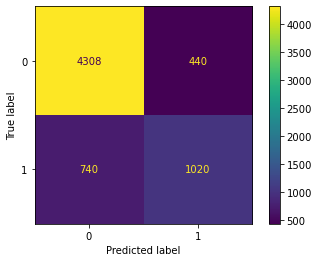

In [200]:
cm = confusion_matrix(y_test, predictions, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC.classes_)
disp.plot()
plt.show()
#Whilst the model is able to predict 0's accurately, 1's (Income over 50k) are not predicted very accurately

In [212]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)
# Undersample the majority class

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
# Oversample the minority class

RFT = RandomForestClassifier(random_state=42)
RFT.fit(X_resampled, y_resampled)
# Train a Random Forest classifier on the resampled data

RandomForestClassifier(random_state=42)

In [214]:
#UnderSampling Majority's
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X,y)


#OverSampling Minority's
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X,y)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [216]:
RFT = RandomForestClassifier(random_state=42)
RFT.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [217]:
predictions = RFT.predict(X_test)

In [218]:
accuracy_score(y_test, predictions)

0.9009621418113365

In [219]:
cm = confusion_matrix(y_test, predictions, labels = RFT.classes_)

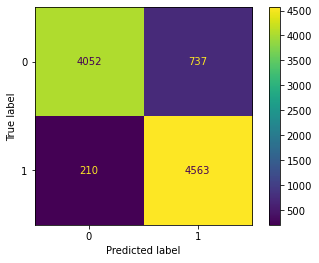

In [221]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC.classes_)
disp.plot()
plt.show()
#Hence, by resampling the data, we are able to get a model that is much more accurate than the model built using regular data

In [242]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP+FN+TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print('True Positive Rate:', TPR)
print('True Negative Rate:', TNR)
print('Positive Prediction Values/Precision:',PPV)
print('negative Prediction Value:', NPV)
print('False Positive Rate:', FPR)
print('False Negative Rate:', FNR)
print('False Discovery Rate:', FDR)

print('Overall Accuracy',(TP+TN)/(TP+FP+FN+TN))



True Positive Rate: [0.84610566 0.95600251]
True Negative Rate: [0.95600251 0.84610566]
Positive Prediction Values/Precision: [0.95072736 0.8609434 ]
negative Prediction Value: [0.8609434  0.95072736]
False Positive Rate: [0.04399749 0.15389434]
False Negative Rate: [0.15389434 0.04399749]
False Discovery Rate: [0.04927264 0.1390566 ]
Overall Accuracy [0.90096214 0.90096214]
